In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import math
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pprint
import numpy as np

In [2]:
from datetime import datetime

In [3]:
plotly.offline.init_notebook_mode(connected=True)

In [4]:
csv_path = '/Users/pbadami/Documents/njtransit/csv'

In [ ]:
csv_path = '/Users/pranav/Documents/development/njtransit/csv'

In [5]:
day = '2018_03_02'

In [6]:
day_df = pd.read_csv('{}/{}.csv'.format(csv_path, day))

In [7]:
day_df[day_df['line'] == 'Gladstone Branch']['from'].unique()

array(['Gladstone', 'Peapack', 'Far Hills', 'Bernardsville',
       'Basking Ridge', 'Lyons', 'Millington', 'Stirling', 'Gillette',
       'Berkeley Heights', 'Murray Hill', 'New Providence', 'Summit',
       'Short Hills', 'Millburn', 'Newark Broad Street', 'Maplewood',
       'South Orange', 'Mountain Station', 'Highland Avenue', 'Orange',
       'Brick Church', 'East Orange', 'Hoboken', 'New York Penn Station'], dtype=object)

In [8]:
nec_list = ['Trenton', 'Hamilton', 'Princeton Junction', 'Jersey Avenue', 'New Brunswick', 'Edison',
             'Metuchen', 'Metropark', 'Rahway', 'Linden', 'Elizabeth', 'North Elizabeth', 'Newark Airport',
             'Newark Penn Station', 'Junction 1', 'Junction 2', 'Secaucus Upper Lvl', 'New York Penn Station']

In [9]:
amtrak_list = ['Philadelphia'] + nec_list

In [10]:
njcl_list = ['Bay Head', 'Point Pleasant Beach', 'Manasquan', 'Spring Lake', 'Belmar', 'Bradley Beach',
             'Asbury Park', 'Allenhurst', 'Elberon', 'Long Branch', 'Monmouth Park', 'Little Silver',
             'Red Bank', 'Middletown NJ', 'Hazlet', 'Aberdeen-Matawan', 'South Amboy', 'Perth Amboy',
             'Woodbridge', 'Avenel', 'Rahway', 'Linden', 'Elizabeth', 'North Elizabeth', 'Newark Airport',
             'Newark Penn Station','Junction 1', 'Junction 2', 'Secaucus Upper Lvl', 'New York Penn Station']
njcl_fork = ['Hoboken']

In [11]:
morristown_list = ['Hackettstown', 'Mount Olive','Netcong','Lake Hopatcong','Mount Arlington','Dover','Denville',
                   'Mount Tabor','Morris Plains','Morristown','Convent Station','Madison','Chatham',
                   'Summit', 'Short Hills','Millburn', 'Maplewood', 'South Orange','Mountain Station', 
                   'Highland Avenue','Orange', 'Brick Church','East Orange','Newark Broad Street', 'Junction 1', 'Junction 2', 'Hoboken']
morristown_fork = ['Secaucus Upper Lvl', 'New York Penn Station']

In [12]:
raritan_list = ['High Bridge', 'Annandale','Lebanon','White House','North Branch','Raritan','Somerville',
                'Bridgewater', 'Bound Brook', 'Dunellen', 'Plainfield', 'Netherwood','Fanwood', 'Westfield',
                'Garwood', 'Cranford', 'Roselle Park', 'Union', 'Newark Penn Station', 'Junction 1', 'Junction 2',
                'Secaucus Upper Lvl', 'New York Penn Station']
raritan_fork = ['Hoboken']

In [13]:
mb_list = ['Hackettstown', 'Mount Olive','Netcong','Lake Hopatcong','Mount Arlington','Dover','Denville',
           'Mountain Lakes', 'Boonton', 'Towaco', 'Lincoln Park','Mountain View','Wayne-Route 23','Little Falls',
           'Montclair State U', 'Montclair Heights', 'Mountain Avenue','Upper Montclair', 'Watchung Avenue',
           'Walnut Street','Bay Street','Glen Ridge','Bloomfield', 'Watsessing Avenue','Newark Broad Street',
           'Junction 1', 'Junction 2', 'Hoboken'] 
mb_fork = ['New York Penn Station', 'Secaucus Upper Lvl']

In [14]:
gladstone_list = ['Gladstone', 'Peapack', 'Far Hills', 'Bernardsville',
                  'Basking Ridge', 'Lyons', 'Millington', 'Stirling', 'Gillette','Berkeley Heights', 'Murray Hill', 
                  'New Providence', 'Summit', 'Short Hills','Millburn', 'Maplewood', 'South Orange',
                  'Mountain Station', 'Highland Avenue','Orange', 'Brick Church','East Orange',
                  'Newark Broad Street', 'Junction 1', 'Junction 2', 'Hoboken']
gladstone_fork = ['Secaucus Upper Lvl', 'New York Penn Station']

In [15]:
def get_linked_dict(line_list):
    linked_dict = {}
    prev_station = None
    next_station = None
    for idx, station in enumerate(line_list):
        if idx < (len(line_list) - 1):
            next_station = line_list[idx + 1]
        else:
            next_station = None
        linked_dict[station] = {-1: [prev_station], 1: [next_station]}
        prev_station = station
    return linked_dict

In [16]:
njcl = get_linked_dict(njcl_list)
njcl['Hoboken'] = {-1: ['Junction 2'], 1: None}
njcl['Junction 2'][1].append('Hoboken')

In [17]:
morristown = get_linked_dict(morristown_list)
morristown['Secaucus Upper Lvl'] = {-1: ['Junction 2'], 1: ['New York Penn Station']}
morristown['New York Penn Station'] = {-1: ['Secaucus Upper Lvl'], 1: None}
morristown['Junction 2'][1].append('Secaucus Upper Lvl')

In [18]:
mb = get_linked_dict(mb_list)
mb['Secaucus Upper Lvl'] = {-1: ['Junction 2'], 1: ['New York Penn Station']}
mb['New York Penn Station'] = {-1: ['Secaucus Upper Lvl'], 1: None}
mb['Junction 2'][1].append('Secaucus Upper Lvl')

In [19]:
gladstone = get_linked_dict(gladstone_list)
gladstone['Secaucus Upper Lvl'] = {-1: ['Junction 2'], 1: ['New York Penn Station']}
gladstone['New York Penn Station'] = {-1: ['Secaucus Upper Lvl'], 1: None}
gladstone['Junction 2'][1].append('Secaucus Upper Lvl')

In [20]:
amtrak = get_linked_dict(amtrak_list)

In [21]:
nec = get_linked_dict(nec_list)

In [22]:
raritan = get_linked_dict(raritan_list)
raritan['Hoboken'] = {-1: ['Junction 2'], 1: None}
raritan['Junction 2'][1].append('Hoboken')

In [23]:
linked_lookup = {'Northeast Corrdr': nec, 
                 'No Jersey Coast': njcl,
                 'Morristown Line': morristown,
                 'Raritan Valley': raritan, 
                 'Montclair-Boonton': mb, 
                 'Gladstone Branch': gladstone,
                 'Amtrak': amtrak}

In [24]:
def clean_delay(sec):
    if sec < 0:
        return 0
    else:
        return sec

# temporarily fix wrong day 
def fix_day(row):
    # wrong day
    if row['delay'] >= (1400*60):
        row['time'] = row['time'] - dt.timedelta(days=1)
        row['delay'] = (row['time'] - row['expected']).total_seconds()
    return row
        
def format_df(df):
    df['expected'] = pd.to_datetime(df['expected'])
    df['time'] = pd.to_datetime(df['time'])

    df['delay']= (df['time']-df['expected']).dt.total_seconds() #calculate delay in seconds
    df['delay']= (df['time']-df['expected']).dt.total_seconds() #calculate delay in seconds
    df = df.apply(fix_day, axis=1)
    df['delay'] = df['delay'].apply(lambda x: clean_delay(x))/60.0 # clean delay and get delay in minutes
    df['status'] = df['status'].fillna("Estimated")
    return df

In [25]:
df = format_df(day_df)

In [26]:
trains = df.groupby(['train_id', 'date'])

In [27]:
trains_last = trains.last()
trains_first = trains.nth(1)

In [28]:
trains_last['day_of_week'] = trains_last['time'].dt.dayofweek
trains_first['day_of_week'] = trains_first['time'].dt.dayofweek

In [29]:
trains_last['hour'] = trains_last['time'].dt.hour
trains_last['sched_hour'] = trains_last['expected'].dt.hour

trains_first['hour'] = trains_first['time'].dt.hour
trains_first['sched_hour'] = trains_first['expected'].dt.hour

In [30]:
trains_last = trains_last[trains_last['type'] == 'NJ Transit'].copy()
trains_first = trains_first[trains_first['type'] == 'NJ Transit'].copy()

In [31]:
def get_severity(row):
    delay = row['delay']
    status = row['status']
    if status == 'Cancelled':
        return "Cancelled"
    if math.isnan(delay):
        return "Unscheduled"
    if 0 <= delay < 3:
        return "On time"
    if 3 <= delay < 6:
        return "3-5 min"
    if 6 <= delay < 10:
        return "6-9 min"
    if 10 <= delay < 20:
        return "10-20 min"
    return "20+ min"

In [32]:
trains_last['severity'] = trains_last.apply(get_severity, axis=1)
trains_first['severity'] = trains_first.apply(get_severity, axis=1)

In [33]:
trains_last.reset_index(level='date', inplace=True)
trains_first.reset_index(level='date', inplace=True)

In [34]:
# turn into dict
colors={'On time': '#39e600', 
        '3-5 min': '#ffff00', 
        '6-9 min': '#ff9933', 
        '10-20 min': '#ff0000', 
        '20+ min': '#990000', 
        'Cancelled': '#827e7d'}
colors_list= ['#39e600', '#ffff00', '#ff9933', '#ff0000', '#990000', '#827e7d']

In [35]:
len(trains_last)

779

In [36]:
len(trains_first)

779

In [37]:
to_nyp = trains_last[trains_last['to'] == "New York Penn Station"].copy()
from_nyp = trains_first[(trains_first['from'] == "New York Penn Station") & (trains_first['severity'] != 'Unscheduled')].copy()

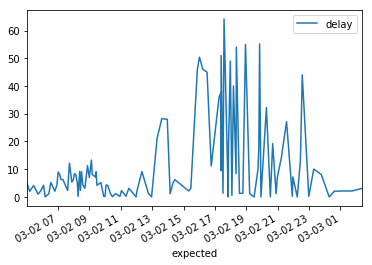

In [38]:
df[(df['from']=='Newark Penn Station') & (df['to']=='Secaucus Upper Lvl')].plot(x='expected', y='delay')

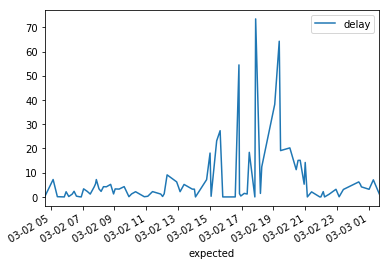

In [39]:
df[(df['from']=='Secaucus Upper Lvl') & (df['to']=='Newark Penn Station')].plot(x='expected', y='delay')

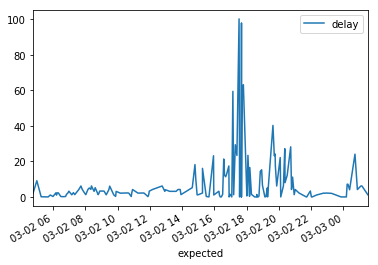

In [40]:
from_nyp.plot(x='expected', y='delay')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1b07d0>]], dtype=object)

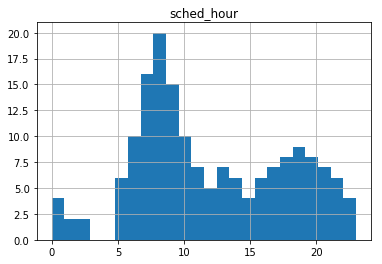

In [41]:
to_nyp.hist('sched_hour', bins=24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f144e90>]], dtype=object)

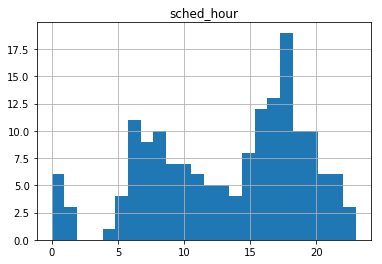

In [42]:
from_nyp.hist('sched_hour', bins=24)

In [43]:
test = to_nyp.copy()
test2 = from_nyp.copy()

In [44]:
test['sequence'] = test.sort_values('time').groupby('sched_hour').cumcount() + 1
test2['sequence'] = test2.sort_values('time').groupby('sched_hour').cumcount() + 1

In [45]:
test['severity_color'] = test['severity'].map(colors)
test2['severity_color'] = test2['severity'].map(colors)

In [46]:
test['id'] = test.index
test2['id'] = test2.index

In [47]:
df[df['train_id'] == '3943']

train_id        date  stop_sequence                   from  from_id  \
3323     3943  2018-03-02            1.0  New York Penn Station      105   
3324     3943  2018-03-02            2.0  New York Penn Station      105   
3325     3943  2018-03-02            3.0     Secaucus Upper Lvl    38187   
3326     3943  2018-03-02            4.0    Newark Penn Station      107   
3327     3943  2018-03-02            5.0     Princeton Junction      125   
3328     3943  2018-03-02            6.0               Hamilton    32905   

                         to  to_id            expected                time  \
3323  New York Penn Station    105 2018-03-02 16:13:00 2018-03-02 16:21:19   
3324     Secaucus Upper Lvl  38187 2018-03-02 16:22:00 2018-03-02 16:21:19   
3325    Newark Penn Station    107 2018-03-02 16:32:00 2018-03-02 16:21:19   
3326     Princeton Junction    125 2018-03-02 17:09:00 2018-03-02 16:21:19   
3327               Hamilton  32905 2018-03-02 17:18:00 2018-03-02 16:21:19   
3328                Trenton    148 2018-03-02 17:26:00 2018-03-02 16:21:19   

         status              line        type     delay  
3323  Cancelled  Northeast Corrdr  NJ Transit  8.316667  
3324  Cancelled  Northeast Corrdr  NJ Transit  0.000000  
3325  Cancelled  Northeast Corrdr  NJ Transit  0.000000  
3326  Cancelled  Northeast Corrdr  NJ Transit  0.000000  
3327  Cancelled  Northeast Corrdr  NJ Transit  0.000000  
3328  Cancelled  Northeast Corrdr  NJ Transit  0.000000

In [48]:
test2[test2['id'] == '3275']

date     delay            expected                   from  \
train_id                                                                    
3275      2018-03-02  1.383333 2018-03-02 18:38:00  New York Penn Station   

          from_id             line    status  stop_sequence  \
train_id                                                      
3275          105  No Jersey Coast  Departed            2.0   

                        time                  to  to_id        type  \
train_id                                                              
3275     2018-03-02 18:39:23  Secaucus Upper Lvl  38187  NJ Transit   

          day_of_week  hour  sched_hour severity  sequence severity_color  \
train_id                                                                    
3275                4    18        18.0  On time        14        #39e600   

            id  
train_id        
3275      3275

In [49]:
trace1 = go.Scatter(
    x = test['sched_hour'],
    y = test['sequence'],
    mode='markers',
    marker=dict(
        size='16',
        color = test['severity_color'], #set color equal to a variable
    ),
    text = test['line'] + test['id']
)
data = [trace1]
plotly.offline.iplot(data)


In [50]:
trace2 = go.Scatter(
    x = test2['sched_hour'],
    y = test2['sequence'],
    mode='markers',
    marker=dict(
        size='16',
        color = test2['severity_color'], #set color equal to a variable
    ),
    text= test2['line'] + test2['id']
)
data = [trace2]
plotly.offline.iplot(data)

In [51]:
relevant = ['New York Penn Station', 'Secaucus Upper Lvl', 'Newark Penn Station', 'Newark Airport'] 

In [52]:
relevant_df = df[(df['from'].isin(relevant)) | (df['to'].isin(relevant))].copy()

In [53]:
len(relevant_df)

1556

In [54]:
unique_ids = relevant_df['train_id'].unique()

In [55]:
relevant_df = df[df['train_id'].isin(unique_ids)].copy()

In [56]:
relevant_df['line'].unique()

array(['Raritan Valley', 'No Jersey Coast', 'Morristown Line',
       'Northeast Corrdr', 'ACELA EXPRESS', 'REGIONAL', 'Amtrak',
       'CRESCENT', 'Montclair-Boonton', 'KEYSTONE', 'CAROLINIAN',
       'Gladstone Branch', 'PENNSYLVANIAN', 'SILVER STAR  -R',
       'SILVER METEOR-R', 'VERMONTER    -R', 'AMTRAK'], dtype=object)

In [57]:
except_lines = ['Gladstone Branch', 'Morristown Line', 'Montclair-Boonton']
except_stations = ['Newark Airport', 'Newark Penn Station', 'Secaucus Upper Lvl', 'New York Penn Station', 'Hoboken']

In [58]:
stations_except_lines = relevant_df[relevant_df['line'].isin(except_lines)]['from'].unique()

In [59]:
slanted = np.setdiff1d(stations_except_lines, except_stations)

In [60]:
station_map_x = {sta:5 for sta in slanted}
station_map_y = {sta:5 for sta in slanted}

In [61]:
map_x = {'Newark Airport': 0,
        'Newark Broad Street': 5,
        'Newark Penn Station': 5,
        'Secaucus Upper Lvl': 10, 
        'New York Penn Station': 15,
        'Hoboken': 10, 
         'Junction 1':6.5,
         'Junction 2':8
            }
map_y = {'Newark Airport': 0,
        'Newark Broad Street': 5,
         'Newark Penn Station': 0,
         'Secaucus Upper Lvl': 0, 
         'New York Penn Station': 0,
         'Hoboken': -5,
        'Junction 1': 0,
        'Junction 2': 0}

In [62]:
station_map_x.update(map_x)

In [63]:
station_map_y.update(map_y)

In [64]:
relevant_df['from_x'] = relevant_df['from'].map(station_map_x)
relevant_df['to_x'] = relevant_df['to'].map(station_map_x)
relevant_df['from_y'] = relevant_df['from'].map(station_map_y)
relevant_df['to_y'] = relevant_df['to'].map(station_map_y)

In [65]:
relevant_df['from_x'].fillna(0, inplace=True)
relevant_df['to_x'].fillna(0, inplace=True)
relevant_df['from_y'].fillna(0, inplace=True)
relevant_df['to_y'].fillna(0, inplace=True)

In [66]:
station_map_x['Newark Airport']

0

In [67]:
def get_direction(group):
    from_x = group.iloc[0]['from_x']
    to_x = group.iloc[-1]['to_x']
    if from_x > to_x:
        group['direction'] = -1
    else:
        group['direction'] = 1
#     print group.iloc[0]['train_id'], from_x, to_x, group.iloc[0]['direction']
    return group

In [68]:
relevant_df = relevant_df.sort_values(['time', 'stop_sequence']).groupby('train_id').apply(get_direction)

In [69]:
cutoff = dt.datetime(2018,3,2,15)
cutoff_end = dt.datetime(2018,3,2,20)

In [70]:
relevant_df = relevant_df[(relevant_df['time'] >= cutoff) & (relevant_df['time'] <= cutoff_end)]

Corrupted NJT trains

In [71]:
corrupted = relevant_df[(relevant_df['from_x'] < relevant_df['to_x']) & (relevant_df['direction'] == -1) & (relevant_df['status'] == 'Departed')]['train_id'].unique()

In [72]:
corrupted_to = relevant_df[(relevant_df['from_x'] > relevant_df['to_x']) & (relevant_df['direction'] == 1) & (relevant_df['status'] == 'Departed')]['train_id'].unique()

In [73]:
corrupted = np.concatenate((corrupted, corrupted_to))

In [74]:
corrupted_to

array(['A19', '5439', '5869'], dtype=object)

In [75]:
len(corrupted)

11

In [76]:
relevant_df['train_id'].nunique()

186

In [77]:
def get_states(from_state, to_state, linked_dict, direction):
    if to_state == from_state:
        return [to_state]
    if from_state is None:
        return None
    else:
        gap_states = None
        if linked_dict[from_state][direction] is None:
            return gap_states
        for station in linked_dict[from_state][direction]:
            ret = get_states(station, to_state, linked_dict, direction)
            if ret is not None:
                gap_states = [from_state] + ret
        return gap_states

In [78]:
def get_state_movement(states, time_diff, time_start):
    total_dist = 0
    state_info = []
    for from_sta, to_sta in zip(states[:-1], states[1:]):
        if from_sta in station_map_x:
            from_x, from_y = station_map_x[from_sta], station_map_y[from_sta]
        else:
            from_x, from_y = 0, 0
        if to_sta in station_map_x:
            to_x, to_y = station_map_x[to_sta], station_map_y[to_sta]
        else:
            to_x, to_y = 0, 0
        from_loc = np.array((from_x, from_y))
        to_loc = np.array((to_x, to_y))
        dist = np.linalg.norm(to_loc-from_loc)
        if dist:
            total_dist = total_dist + dist
            state_info.append({
                'from': from_sta,
                'to': to_sta,
                'from_x': from_x,
                'from_y': from_y,
                'to_x': to_x,
                'to_y': to_y,
                'dist': dist    
            })
    if total_dist:
        for info in state_info:
            frac = info['dist']/total_dist
            this_diff = time_diff*frac
            info['start'] = time_start
            info['end'] = time_start + dt.timedelta(seconds=this_diff)
            time_start = info['end']
            if not this_diff:
                this_diff = 1
            info['x_delta'] = float(info['to_x'] - info['from_x'])/this_diff
            info['y_delta'] = float(info['to_y'] - info['from_y'])/this_diff
                
    else:
        from_sta = states[0]
        to_sta = states[-1]
        if from_sta in station_map_x:
            from_x, from_y = station_map_x[from_sta], station_map_y[from_sta]
        else:
            from_x, from_y = 0, 0
        if to_sta in station_map_x:
            to_x, to_y = station_map_x[to_sta], station_map_y[to_sta]
        else:
            to_x, to_y = 0, 0
            
        state_info = [{'from': from_sta,
                        'to': to_sta,
                        'from_x':  from_x,
                        'from_y':  from_y,
                        'to_x':  to_x,
                        'to_y':  to_y,
                        'dist': total_dist,
                       'start': time_start,
                       'end': time_start + dt.timedelta(seconds=time_diff),
                       'x_delta': 0,
                       'y_delta': 0}]
    return state_info

In [86]:
test_df = relevant_df[~relevant_df['train_id'].isin(corrupted)]
test_df = test_df[test_df['status'] != 'Cancelled']
# test_df = test_df.iloc[0:500]
test_df['from_y'] = test_df['from_y'] + 0.2*test_df['direction']
test_df['to_y'] = test_df['to_y'] + 0.2*test_df['direction']
min_time = test_df['time'].min()
train_dict = {}
train_x = []
train_y = []
train_text = []
for index, row in test_df.sort_values('time').iterrows():
    t_id = row['train_id']
    if not t_id in train_dict:
        # put first state
        train_dict[t_id] = {}
        train_dict[t_id]['idx'] = len(train_x)
        train_dict[t_id]['start_x'] = row['to_x']
        train_dict[t_id]['start_y'] = row['to_y']
        train_x.append(row['to_x'])
        train_y.append(row['to_y'])
        train_text.append(t_id)
        train_dict[t_id]['state'] = [{'start': min_time,
                                      'end': row['time'],
                                      'x_delta': 0,
                                      'y_delta': 0}]
        train_dict[t_id]['state_count'] = 0
    else:
        # get states
        prev_state = train_dict[t_id]['state'][-1]
        if row['line'] in linked_lookup:
            linked_dict = linked_lookup[row['line']]
        else:
            linked_dict = linked_lookup['Amtrak']
        gap_states = get_states(row['from'], row['to'], linked_dict, row['direction'])
        if gap_states is None:
            print row['from'], row['to'], row['line'], row['direction'], row['train_id']
        else:
            
            time_diff = (row['time'] - prev_state['end']).total_seconds()
            time_start = prev_state['end']
            state_info = get_state_movement(gap_states, time_diff, time_start)
            train_dict[t_id]['state'] = train_dict[t_id]['state'] + state_info

Orange Newark Broad Street Morristown Line -1 6341
New Brunswick Metropark Northeast Corrdr -1 3957
Jersey Avenue Edison Northeast Corrdr -1 3957
Edison Metuchen Northeast Corrdr -1 3957


In [87]:
min_time = test_df['time'].min()
current_time = min_time
max_time = test_df['time'].max()
time_step = 60 # seconds
slider_time_step = 900
frames = []

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}
times = []
total_time_step = 0

while current_time < max_time:
    times.append(current_time)
    animate_to = current_time + dt.timedelta(seconds=time_step)
    for t_id, train in train_dict.iteritems():
        time_cursor = current_time
        idx = train['idx']
        if not 'completed' in train:
            current_state = train['state_count']
            x_delta = 0
            y_delta = 0
            t = 0
            while time_cursor < animate_to:
                state = train['state'][current_state]
                if state['end'] > animate_to:
                    t = animate_to - time_cursor
                else:
                    t = state['end'] - time_cursor
                    train['state_count'] = train['state_count'] + 1
                    if current_state < (len(train['state']) - 1):
                        current_state = current_state + 1
                    else:
#                         t = t + (animate_to-time_cursor)
                        time_cursor = animate_to
                        train['completed'] = True
                x_delta = x_delta + state['x_delta']*t.total_seconds()
                y_delta = y_delta + state['y_delta']*t.total_seconds()
                time_cursor = time_cursor + t
            train_x[idx] = train_x[idx] + x_delta
            train_y[idx] = train_y[idx] + y_delta
    slider_step = {'args': [
        [current_time],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': current_time,
     'method': 'animate'}
    
    current_time = animate_to
    frames.append({'data': [{'x': list(train_x), 'y': list(train_y), 'text': train_text}], 'name': str(current_time)})
    
    total_time_step = total_time_step + time_step
    if not (total_time_step % slider_time_step):
        sliders_dict['steps'].append(slider_step)


In [88]:
len(frames)

300

In [104]:
figure = {'data': [{'x': [0, 1], 'y': [0, 1], 'type': 'scatter', 'mode':'markers'}],
          'layout': {'xaxis': {'range': [0, 20], 'autorange': False},
                     'yaxis': {'range': [-10, 10], 'autorange': True, 'scaleanchor': "x",},
                     'title': 'Start Title',
                     'annotations': [{
                                        'x':5,
                                        'y':1,
                                        'xref':'x',
                                        'yref':'y',
                                        'text':'NWP',
                                        'showarrow': False
                                     }, 
                                     {
                                        'x':10,
                                        'y':1,
                                        'xref':'x',
                                        'yref':'y',
                                        'text':'SEC',
                                        'showarrow': False
                                     }, 
                                     {
                                        'x':15,
                                        'y':1,
                                        'xref':'x',
                                        'yref':'y',
                                        'text':'NYP',
                                        'showarrow': False
                                     }, 
                                     {
                                        'x':5,
                                        'y':6,
                                        'xref':'x',
                                        'yref':'y',
                                        'text':'ND',
                                        'showarrow': False
                                     },
                                     {
                                        'x':10,
                                        'y':-4,
                                        'xref':'x',
                                        'yref':'y',
                                        'text':'HOB',
                                        'showarrow': False
                                     }],
        
                     'shapes': [
                        # Newark to NY Penn
                        {
                            'type': 'line',
                            'x0': 0,
                            'y0': 0,
                            'x1': 15,
                            'y1': 0,
                            'line': {
                                'color': 'rgb(55, 128, 191)',
                                'width': 3,
                            },
                        },
                        # Newark Broad St to Junction 1
                        {
                            'type': 'line',
                            'x0': 5,
                            'y0': 5,
                            'x1': 6.5,
                            'y1': 0,
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 3,
                            },
                        },
                        # Junction 2 to Hoboken 
                        {
                            'type': 'line',
                            'x0': 8,
                            'y0': 0,
                            'x1': 10,
                            'y1': -5,
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 3,
                            },
                        },
                        # Newark Broad Street
                         {
                            'type': 'circle',
                            'xref': 'x',
                            'yref': 'y',
                            'fillcolor': 'rgb(50, 171, 96)',
                            'x0': 4.5,
                            'y0': 4.5,
                            'x1': 5.5,
                            'y1': 5.5,
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                            },
                        },
                         # Newark Penn
                         {
                            'type': 'circle',
                            'xref': 'x',
                            'yref': 'y',
                            'fillcolor': 'rgb(50, 171, 96)',
                            'x0': 4.5,
                            'y0': -0.5,
                            'x1': 5.5,
                            'y1': 0.5,
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                            },
                        },
                         # Secaucus
                         {
                            'type': 'circle',
                            'xref': 'x',
                            'yref': 'y',
                            'fillcolor': 'rgb(50, 171, 96)',
                            'x0': 9.5,
                            'y0': -0.5,
                            'x1': 10.5,
                            'y1': 0.5,
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                            },
                        },
                         # Hoboken
                         {
                            'type': 'circle',
                            'xref': 'x',
                            'yref': 'y',
                            'fillcolor': 'rgb(50, 171, 96)',
                            'x0': 9.5,
                            'y0': -5.5,
                            'x1': 10.5,
                            'y1': -4.5,
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                            },
                        },
                        # New York Penn
                         {
                            'type': 'circle',
                            'xref': 'x',
                            'yref': 'y',
                            'fillcolor': 'rgb(50, 171, 96)',
                            'x0': 14.5,
                            'y0': 0.5,
                            'x1': 15.5,
                            'y1': -0.5,
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                            },
                        }
                     ]},
        
                          'frames': frames
                         }
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': times[0],
    'plotlycommand': 'animate',
    'values': times,
    'visible': True
}

figure['layout']['sliders'] = [sliders_dict]
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]



plotly.offline.iplot(figure)